In [1]:
# Modules that we need
from Vissim_env_class import environment, Load_Vissim
from MasterDQN_Agent import MasterDQN_Agent

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json


In [3]:
vissim \
= \
Load_Vissim(
Path_to_network = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_9_Cross_Experiment\\Single_Cross_TripleMOVA\\',\
inpx_Filename = 'Single_Cross_Triple.inpx',\
layx_Filename = 'Single_Cross_Triple.layx',\
attempts=5
)

fail
fail
success


# DQN Train

In [7]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [5]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [100,100,100,100],
             1 : [200,200,200,200],
             2 : [300,300,300,300],
             3 : [400,400,400,400],
             4 : [500,500,500,500],
             5 : [600,600,600,600],
             6 : [700,700,700,700],
             7 : [800,800,800,800],
             8 : [900,900,900,900],
             9 : [1000,1000,1000,1000]
            }
}

In [6]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [400,400,400,400],
             1 : [400,400,400,400],
             2 : [400,400,400,400],
             3 : [400,400,400,400],
             4 : [400,400,400,400],
             5 : [400,400,400,400],
             6 : [400,400,400,400],
             7 : [400,400,400,400],
             8 : [400,400,400,400],
             9 : [400,400,400,400],
            }
}

In [13]:
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = False
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

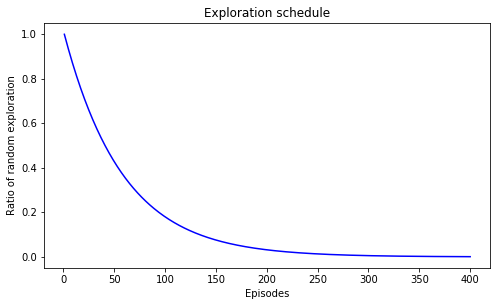

In [14]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 1

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [15]:
Single_Cross_Triple8_MultiDQN_Agents = MasterDQN_Agent(model_name, 
                                                       vissim_working_directory, 
                                                       sim_length, 
                                                       Single_Cross_Triple_dictionary8,
                                                       'default_actions',
                                                       gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

INTERSECTION 0: SETTING UP AGENT
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 13)           0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 24)           336         input_3[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 24)           600         dense_12[0][0]                   
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 24)           600         dense_13[0][0]                   
____________________________________________________________________________

In [16]:
Single_Cross_Triple8_MultiDQN_Agents.prepopulate_memory(vissim = vissim)

In [17]:
vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)
vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode", 1)
vissim.Simulation.SetAttValue('SimRes', 1)
vissim.SuspendUpdateGUI()  

In [18]:
Single_Cross_Triple8_MultiDQN_Agents.train(400, vissim = vissim) 

Random seed set in simulator. Random Seed = 1
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: train
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.08 seconds.

start
Random Seed Set to 2
Episode 1: Finished running.
Agent 0, Average Reward: -1402.25
Saving architecture, weights, optimizer state for best agent-0
Epoch 1/1
 - 1s - loss: 70819.5859
Reducing exploration for all agents to 0.9828

Episode 2: Starting computation.
Random Seed Set to 3
Episode 2: Finished running.
Agent 0, Average Reward: -1330.05
Saving architecture, weights, optimizer state for best agent-0
Epoch 1/1
 - 0s - loss: 91692.9453
Reducing exploration for all agents to 0.966

Episode 3: Starting computation.
Random Seed Set to 4
Episode 3: Finished running.
Agent 0, Average Reward: -1576.44
Epoch 1/1
 - 0s - loss: 114007.2891
Reducing exploration for all agents to 0.9494

Ep

Reducing exploration for all agents to 0.527

Episode 38: Starting computation.
Random Seed Set to 39
Episode 38: Finished running.
Agent 0, Average Reward: -2071.58
Epoch 1/1
 - 0s - loss: 14546.1768
Reducing exploration for all agents to 0.5179

Episode 39: Starting computation.
Random Seed Set to 40
Episode 39: Finished running.
Agent 0, Average Reward: -816.47
Epoch 1/1
 - 0s - loss: 25083.8750
Reducing exploration for all agents to 0.5091

Episode 40: Starting computation.
Random Seed Set to 41
Episode 40: Finished running.
Agent 0, Average Reward: -2166.97
Epoch 1/1
 - 0s - loss: 19497.5293
Weights succesfully copied to Target model for Agent 0.
Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.5003

Episode 41: Starting computation.
Random Seed Set to 42
Episode 41: Finished running.
Agent 0, Average Reward:

Random Seed Set to 77
Episode 76: Finished running.
Agent 0, Average Reward: -2323.11
Epoch 1/1
 - 0s - loss: 25876.9043
Reducing exploration for all agents to 0.2683

Episode 77: Starting computation.
Random Seed Set to 78
Episode 77: Finished running.
Agent 0, Average Reward: -2124.37
Epoch 1/1
 - 0s - loss: 6152.6035
Reducing exploration for all agents to 0.2637

Episode 78: Starting computation.
Random Seed Set to 79
Episode 78: Finished running.
Agent 0, Average Reward: -2013.12
Epoch 1/1
 - 0s - loss: 11162.7998
Reducing exploration for all agents to 0.2591

Episode 79: Starting computation.
Random Seed Set to 80
Episode 79: Finished running.
Agent 0, Average Reward: -268.61
Epoch 1/1
 - 0s - loss: 31448.2207
Reducing exploration for all agents to 0.2547

Episode 80: Starting computation.
Random Seed Set to 81
Episode 80: Finished running.
Agent 0, Average Reward: -2042.16
Epoch 1/1
 - 0s - loss: 29833.0605
Weights succesfully copied to Target model for Agent 0.
Saving architectu

Episode 114: Finished running.
Agent 0, Average Reward: -2666.55
Epoch 1/1
 - 0s - loss: 43016.5938
Reducing exploration for all agents to 0.1389

Episode 115: Starting computation.
Random Seed Set to 116
Episode 115: Finished running.
Agent 0, Average Reward: -1808.07
Epoch 1/1
 - 0s - loss: 8585.5527
Reducing exploration for all agents to 0.1366

Episode 116: Starting computation.
Random Seed Set to 117
Episode 116: Finished running.
Agent 0, Average Reward: -2114.45
Epoch 1/1
 - 0s - loss: 12903.5234
Reducing exploration for all agents to 0.1342

Episode 117: Starting computation.
Random Seed Set to 118
Episode 117: Finished running.
Agent 0, Average Reward: -1448.92
Epoch 1/1
 - 0s - loss: 39338.0117
Reducing exploration for all agents to 0.1319

Episode 118: Starting computation.
Random Seed Set to 119
Episode 118: Finished running.
Agent 0, Average Reward: -2728.7
Epoch 1/1
 - 0s - loss: 57533.0859
Reducing exploration for all agents to 0.1297

Episode 119: Starting computation.


Random Seed Set to 153
Episode 152: Finished running.
Agent 0, Average Reward: -2754.62
Epoch 1/1
 - 0s - loss: 69695.5781
Reducing exploration for all agents to 0.072

Episode 153: Starting computation.
Random Seed Set to 154
Episode 153: Finished running.
Agent 0, Average Reward: -2605.42
Epoch 1/1
 - 0s - loss: 55024.4648
Reducing exploration for all agents to 0.0707

Episode 154: Starting computation.
Random Seed Set to 155
Episode 154: Finished running.
Agent 0, Average Reward: -2433.12
Epoch 1/1
 - 0s - loss: 25943.9961
Reducing exploration for all agents to 0.0695

Episode 155: Starting computation.
Random Seed Set to 156
Episode 155: Finished running.
Agent 0, Average Reward: -2735.01
Epoch 1/1
 - 0s - loss: 10702.2969
Reducing exploration for all agents to 0.0683

Episode 156: Starting computation.
Random Seed Set to 157
Episode 156: Finished running.
Agent 0, Average Reward: -2923.57
Epoch 1/1
 - 0s - loss: 24624.5527
Reducing exploration for all agents to 0.0672

Episode 157

Random Seed Set to 191
Episode 190: Finished running.
Agent 0, Average Reward: -3480.85
Epoch 1/1
 - 0s - loss: 62106.0000
Reducing exploration for all agents to 0.0373

Episode 191: Starting computation.
Random Seed Set to 192
Episode 191: Finished running.
Agent 0, Average Reward: -3171.3
Epoch 1/1
 - 0s - loss: 63623.6445
Reducing exploration for all agents to 0.0366

Episode 192: Starting computation.
Random Seed Set to 193
Episode 192: Finished running.
Agent 0, Average Reward: -2422.84
Epoch 1/1
 - 0s - loss: 28984.9863
Reducing exploration for all agents to 0.036

Episode 193: Starting computation.
Random Seed Set to 194
Episode 193: Finished running.
Agent 0, Average Reward: -2483.28
Epoch 1/1
 - 0s - loss: 10893.7285
Reducing exploration for all agents to 0.0354

Episode 194: Starting computation.
Random Seed Set to 195
Episode 194: Finished running.
Agent 0, Average Reward: -2875.49
Epoch 1/1
 - 0s - loss: 25270.8359
Reducing exploration for all agents to 0.0348

Episode 195:

Random Seed Set to 229
Episode 228: Finished running.
Agent 0, Average Reward: -2332.98
Epoch 1/1
 - 0s - loss: 74575.2891
Reducing exploration for all agents to 0.0193

Episode 229: Starting computation.
Random Seed Set to 230
Episode 229: Finished running.
Agent 0, Average Reward: -2703.62
Epoch 1/1
 - 0s - loss: 119382.4531
Reducing exploration for all agents to 0.019

Episode 230: Starting computation.
Random Seed Set to 231
Episode 230: Finished running.
Agent 0, Average Reward: -2741.64
Epoch 1/1
 - 0s - loss: 82251.6953
Reducing exploration for all agents to 0.0186

Episode 231: Starting computation.
Random Seed Set to 232
Episode 231: Finished running.
Agent 0, Average Reward: -2186.09
Epoch 1/1
 - 0s - loss: 37750.2695
Reducing exploration for all agents to 0.0183

Episode 232: Starting computation.
Random Seed Set to 233
Episode 232: Finished running.
Agent 0, Average Reward: -2637.46
Epoch 1/1
 - 0s - loss: 17636.9551
Reducing exploration for all agents to 0.018

Episode 233

Random Seed Set to 267
Episode 266: Finished running.
Agent 0, Average Reward: -2678.18
Epoch 1/1
 - 0s - loss: 29304.8457
Reducing exploration for all agents to 0.01

Episode 267: Starting computation.
Random Seed Set to 268
Episode 267: Finished running.
Agent 0, Average Reward: -2488.05
Epoch 1/1
 - 0s - loss: 49187.4258
Reducing exploration for all agents to 0.0098

Episode 268: Starting computation.
Random Seed Set to 269
Episode 268: Finished running.
Agent 0, Average Reward: -2372.75
Epoch 1/1
 - 0s - loss: 110924.8516
Reducing exploration for all agents to 0.0097

Episode 269: Starting computation.
Random Seed Set to 270
Episode 269: Finished running.
Agent 0, Average Reward: -2686.23
Epoch 1/1
 - 0s - loss: 154022.5469
Reducing exploration for all agents to 0.0095

Episode 270: Starting computation.
Random Seed Set to 271
Episode 270: Finished running.
Agent 0, Average Reward: -981.94
Epoch 1/1
 - 0s - loss: 75945.9688
Reducing exploration for all agents to 0.0093

Episode 271

Random Seed Set to 305
Episode 304: Finished running.
Agent 0, Average Reward: -3380.41
Epoch 1/1
 - 0s - loss: 105355.3203
Reducing exploration for all agents to 0.0052

Episode 305: Starting computation.
Random Seed Set to 306
Episode 305: Finished running.
Agent 0, Average Reward: -2844.26
Epoch 1/1
 - 0s - loss: 90350.4844
Reducing exploration for all agents to 0.0051

Episode 306: Starting computation.
Random Seed Set to 307
Episode 306: Finished running.
Agent 0, Average Reward: -2653.93
Epoch 1/1
 - 0s - loss: 20899.4727
Reducing exploration for all agents to 0.005

Episode 307: Starting computation.
Random Seed Set to 308
Episode 307: Finished running.
Agent 0, Average Reward: -3404.79
Epoch 1/1
 - 0s - loss: 29861.4883
Reducing exploration for all agents to 0.0049

Episode 308: Starting computation.
Random Seed Set to 309
Episode 308: Finished running.
Agent 0, Average Reward: -3397.76
Epoch 1/1
 - 0s - loss: 74959.3516
Reducing exploration for all agents to 0.0048

Episode 30

Random Seed Set to 343
Episode 342: Finished running.
Agent 0, Average Reward: -2881.77
Epoch 1/1
 - 0s - loss: 50987.1250
Reducing exploration for all agents to 0.0027

Episode 343: Starting computation.
Random Seed Set to 344
Episode 343: Finished running.
Agent 0, Average Reward: -1775.93
Epoch 1/1
 - 0s - loss: 24681.7012
Reducing exploration for all agents to 0.0026

Episode 344: Starting computation.
Random Seed Set to 345
Episode 344: Finished running.
Agent 0, Average Reward: -1504.87
Epoch 1/1
 - 0s - loss: 90994.2188
Reducing exploration for all agents to 0.0026

Episode 345: Starting computation.
Random Seed Set to 346
Episode 345: Finished running.
Agent 0, Average Reward: -2041.59
Epoch 1/1
 - 0s - loss: 71449.7578
Reducing exploration for all agents to 0.0025

Episode 346: Starting computation.
Random Seed Set to 347
Episode 346: Finished running.
Agent 0, Average Reward: -1775.45
Epoch 1/1
 - 0s - loss: 84559.9219
Reducing exploration for all agents to 0.0025

Episode 34

Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.0014

Episode 381: Starting computation.
Random Seed Set to 382
Episode 381: Finished running.
Agent 0, Average Reward: -2494.58
Epoch 1/1
 - 0s - loss: 106880.7266
Reducing exploration for all agents to 0.0014

Episode 382: Starting computation.
Random Seed Set to 383
Episode 382: Finished running.
Agent 0, Average Reward: -3438.98
Epoch 1/1
 - 0s - loss: 54104.1641
Reducing exploration for all agents to 0.0013

Episode 383: Starting computation.
Random Seed Set to 384
Episode 383: Finished running.
Agent 0, Average Reward: -2446.67
Epoch 1/1
 - 0s - loss: 33436.5000
Reducing exploration for all agents to 0.0013

Episode 384: Starting computation.
Random Seed Set to 385
Episode 384: Finished running.
Agent 0, Average Reward: -3702.26
Epoch 1/1
 - 0s - loss: 47004.5312
Reducing exploration for all agents to 0.0013

Episode 385: Starting computation.
Random Seed Set

In [ ]:
#Single_Cross_Triple8_MultiDQN_Agents.load(400,best = True)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.demo(vissim=vissim)

Random seed set in simulator. Random Seed = 401
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: demo
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.66 seconds.



In [ ]:
data = []    

End_of_simulation = 3600
no_of_simulations = 1
demands = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

Vissim = vissim

Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.SuspendUpdateGUI()
Vissim.Simulation.SetAttValue('SimPeriod', End_of_simulation)
Vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)

for demand in demands :
    for simRun in Vissim.Net.SimulationRuns:
        Vissim.Net.SimulationRuns.RemoveSimulationRun(simRun)
    
    for V_input in list(Vissim.Net.VehicleInputs):
        V_input.SetAttValue('Volume(1)', demand)
        
    Single_Cross_Triple8_MultiDQN_Agents.Model_dictionnary = Single_Cross_Triple_dictionary8
    
#     Single_Cross_Straight_MultiAC_Agents\
#     = MasterAC_Agent(model_name, 
#                      vissim_working_directory, 
#                      sim_length, 
#                      Single_Cross_Straight_dictionary,
#                      n_step_size, gamma, alpha, entropy, value, 
#                      Random_Seed = Random_Seed, timesteps_per_second = 1, 
#                      Session_ID = Session_ID, verbose = True, 
#                      horizon = horizon, n_sample = n_sample,
#                      save_location = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Desktop')
    
#     Single_Cross_Straight_MultiAC_Agents.load(episode=100,
#                                               best=False, 
#                                               load_location='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\Single_Cross_Straight\\Agents_Results\\Neil_Results\\Neils_Good_Agents\\Oct24'
#                                          )
    
    Single_Cross_Triple8_MultiDQN_Agents.test(vissim=Vissim)
    
    data.append([demand, Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')])
    print(data[-1]) 

In [ ]:
data

In [ ]:
f= open("DQN_Demands.txt","w+")

f.write('demand, junction_1, junction_2, junction_3, junction_4')

for i in range(len(data)):
    f.write('\n')
    for j in range(len(data[i])):
        if j == 0 :
            f.write(str(data[i][j])+', ')
        if j == 1:
            for k in range(len(data[i][j])):
                f.write(str(data[i][j][k][1])+', ')
    
f.close()

In [ ]:
Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')

In [ ]:
for V_input in list(Vissim.Net.VehicleInputs):
    V_input.SetAttValue('Volume(1)', 200)

In [ ]:
Vissim.Net.VehicleInputs

# Debug

In [ ]:
self = Single_Cross_Triple8_MultiDQN_Agents
vissim_working_directory = self.vissim_working_directory 
model_name = self.model_name  
agent_type = self.agent_type
Session_ID = self.Session_ID
episode = 400
self.ID = 0 

Filename = os.path.join(vissim_working_directory, 
                        model_name, 
                        "Agents_Results", 
                        agent_type, 
                        Session_ID,
                        'Episode'+ str(episode) +'Agent'+str(self.ID)+'.h5')

In [ ]:
Filename

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
load_model(Filename)